### Exploratory Data analysis of COVID-19 in India

In [242]:
import numpy as np
import folium
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()
% matplotlib inline
import re
import seaborn as sns

In [243]:
location = pd.read_html("http://www.quickgs.com/latitudinal-and-longitudinal-extents-of-india-indian-states-and-cities/") 
coords=pd.DataFrame(location[0])
coords.head()

,State,Latitude,Longitude
0,Andhra Pradesh,15.91°N,79.74°E
1,Arunachal Pradesh,28.21°N,94.72°E
2,Assam,26.20°N,92.93°E
3,Bihar,25.09°N,85.31°E
4,Chhattisgarh,21.27°N,81.86°E


In [244]:
covidstats = pd.read_html('https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data/India_medical_cases_by_state_and_union_territory')
covid_data=pd.DataFrame(covidstats[0])
covid_data=covid_data.iloc[:36]
covid_data.dropna(axis=1,how='all',inplace=True)
covid_data


[show all].mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:"[ "}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:" ]"}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}.mw-parser-output .infobox .navbar{font-size:100%}.mw-parser-output .navbox .navbar{display:block;font-size:100%}.mw-parser-output .navbox-title .navbar{float:left;text-align:left;margin-right:0.5em}viewtalkeditCOVID-19 pandemic in India by state and union territory  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                State/Union Territory   
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              36 / 36   
0                         Andaman and Nicobar Islands                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [245]:
def data_pre(cord):
    return cord[0:5]
coords['Latitude']  = coords['Latitude'].apply(data_pre).astype('float')
coords['Longitude'] = coords['Longitude'].apply(data_pre).astype('float')
coords.head()
#coords


,State,Latitude,Longitude
0,Andhra Pradesh,15.91,79.74
1,Arunachal Pradesh,28.21,94.72
2,Assam,26.20,92.93
3,Bihar,25.09,85.31
4,Chhattisgarh,21.27,81.86


In [246]:
# Renaming Attribute Names for simplicity
covid_data.columns = ['State','Total cases','Deaths','Recoveries','Active cases']
covid_data=covid_data.reset_index(drop=True)
covid_data.columns
covid_DATA=pd.DataFrame(covid_data)
covid_DATA=covid_DATA.reset_index(drop=True)

In [247]:
covid_DATA['Total cases']=pd.to_numeric(covid_DATA['Total cases'],errors='ignore')
covid_DATA['Deaths']=pd.to_numeric(covid_DATA['Deaths'],errors='ignore')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3][:7]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16][:5]
covid_DATA['Deaths'][16]=covid_DATA['Deaths'][16].replace(',','')
covid_DATA['Total cases'][3]=covid_DATA['Total cases'][3].replace(',','')
covid_DATA

,State,Total cases,Deaths,Recoveries,Active cases
0,Andaman and Nicobar Islands,6150,70,5850,230
1,Andhra Pradesh,1163994,8207,1003935,151852
2,Arunachal Pradesh,18958,59,17363,1536
3,Assam,263450,1389,234237,27824
4,Bihar,509047,2821,398558,107668
5,Chandigarh,45196,507,36746,7943
6,Chhattisgarh,771701,9275,641449,120977
7,Dadra and Nagar Haveli and Daman and Diu,8008,4,6334,1670
8,Delhi,1212989,17414,1105983,89592
9,Goa,98088,1320,70929,25839


In [248]:
final_data = pd.merge(coords, covid_DATA, how ='inner', on ='State')
final_data

,State,Latitude,Longitude,Total cases,Deaths,Recoveries,Active cases
0,Andhra Pradesh,15.91,79.74,1163994,8207,1003935,151852
1,Arunachal Pradesh,28.21,94.72,18958,59,17363,1536
2,Assam,26.20,92.93,263450,1389,234237,27824
3,Bihar,25.09,85.31,509047,2821,398558,107668
4,Chhattisgarh,21.27,81.86,771701,9275,641449,120977
5,Goa,15.29,74.12,98088,1320,70929,25839
6,Gujarat,22.25,71.19,607422,7648,452275,147499
7,Haryana,29.05,76.08,527773,4626,418425,104722
8,Himachal Pradesh,31.10,77.17,107121,1612,83721,21788
9,Jharkhand,23.61,85.27,251371,3073,188623,59675


In [249]:
final_data['Total cases']=final_data['Total cases'].astype(str).astype(int)
final_data['Deaths']=final_data['Deaths'].astype(str).astype(int)
final_data['Recoveries']=final_data['Recoveries'].astype(str).astype(int)
final_data['Active cases']=final_data['Active cases'].astype(str).astype(int)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         27 non-null     object 
 1   Latitude      27 non-null     float64
 2   Longitude     27 non-null     float64
 3   Total cases   27 non-null     int32  
 4   Deaths        27 non-null     int32  
 5   Recoveries    27 non-null     int32  
 6   Active cases  27 non-null     int32  
dtypes: float64(2), int32(4), object(1)
memory usage: 1.3+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


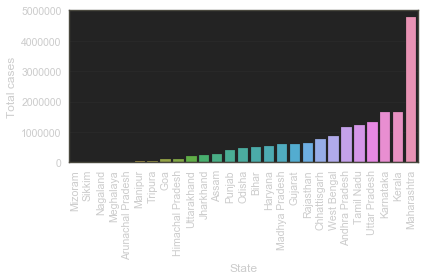

In [250]:
sns.barplot(x='State',y='Total cases',data=final_data.sort_values(by='Total cases'))
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


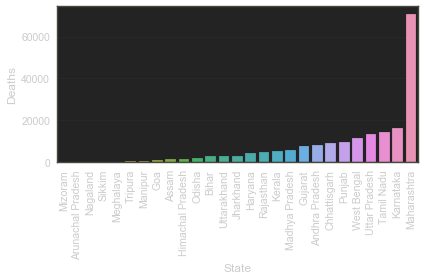

In [251]:
sns.barplot(x='State',y='Deaths',data=final_data.sort_values(by='Deaths'))
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


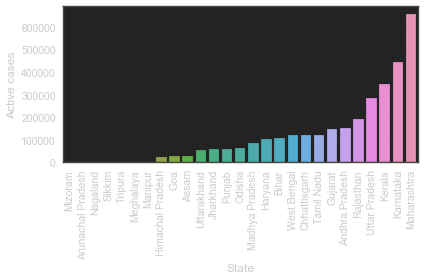

In [252]:
sns.barplot(x='State',y='Active cases',data=final_data.sort_values(by='Active cases'))
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text xticklabel objects>)

C:\Users\COMPUTER\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


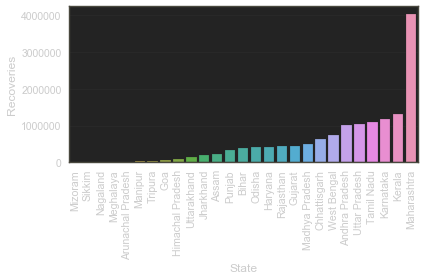

In [254]:
sns.barplot(x='State',y='Recoveries',data=final_data.sort_values(by='Recoveries'))
plt.xticks(rotation='vertical')

In [255]:
# retreiving the data from final table and plotting it on the INDIA map
# creating the map object zooming on INDIA, location here shows the lat and long of INDIA
India = folium.Map(location = [20.5937,78.9629],zoom_start=4.5)


#
#adding to map
for state,lat,long,total_cases,Death,Recov,Active in zip(list(final_data['State']),list(final_data['Latitude']),list(final_data['Longitude']),list(final_data['Total cases']),list(final_data['Deaths']),list(final_data['Recoveries']),list(final_data['Active cases'])):
    #for creating circle marker
    
    
    
    
    folium.CircleMarker(location = [lat,long],
                       radius = 5,
                       color='red',
                       fill = True,
                       fill_color="red").add_to(India)
    #for creating marker
    folium.Marker(location = [lat,long],
                  # adding information that need to be displayed on popup
                  popup=folium.Popup(('<strong><b>State  : '+state+'</strong> <br>' +
                    '<strong><b>Total Cases : '+str(total_cases)+'</striong><br>' +
                    '<strong><font color= red>Deaths : </font>'+str(Death)+'</striong><br>' +
                    '<strong><font color=green>Recoveries : </font>'+str(Recov)+'</striong><br>' +
                    '<strong><font color=brown>Active Cases :</font>'+str(Active)+'</striong>' ),max_width=200)).add_to(India)
#to show the map
India

#webbrowser.open(map, new=2)